### Characterizing the problem of existence of a regional  in the equivalent layer 

###  The regional is represented by an additive constant or first- or second-order polynomial  surfaces to the data. - By Valeria CF Barbosa.
#### Larissa's Thesis 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import cPickle as pickle
import datetime
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st

from __future__ import division
from future.builtins import super

import auxiliary_functions as af
import auxiliary_functions_Larissa_Project as af_L

import fatiando
from fatiando import gridder
from fatiando.mesher import Prism, PointGrid
from fatiando.gridder import regular
from fatiando.gravmag import prism, sphere
from fatiando.gravmag.eqlayer import EQLTotalField
from fatiando.gravmag.eqlayer import EQLGravity
from fatiando.inversion.regularization import Damping, Smoothness2D
from fatiando.inversion.hyper_param import LCurve
from fatiando.vis import mpl, myv
from fatiando.utils import ang2vec, vec2ang, contaminate, dircos
from fatiando.constants import G, SI2MGAL,SI2EOTVOS

C:\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
C:\Anaconda2\lib\site-packages\fatiando\vis\myv.py:53: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


Executed auxiliary_functions_Larissa_Project.py


In [2]:
from numpy import linalg
from scipy.optimize import nnls
from scipy.sparse import identity
from scipy.sparse import diags
from scipy.stats import norm



In [3]:
notebook_name = 'Equivalent_Layer_Larissa_Regional_.ipynb'

In [4]:
print("Version of Fatiando a Terra used: {}".format(fatiando.__version__))

Version of Fatiando a Terra used: ac2afbcb2d99b18f145cc1ed40075beb5f92dd5a


# Load the synthetic model formed by one prism

In [5]:
with open('../data/model_single.pickle') as f:
        full_model = pickle.load(f)

##  Load the grid of points

In [6]:
with open('../data/regular_grid.pickle') as f:
        regular_grid = pickle.load(f)

## Define the horizontal coordinates (xp, yp) and the vertical coordinate (zp) of the observation surface

In [7]:
#coordinates x and y of the data
xp, yp = regular(regular_grid['area'], regular_grid['shape'])


#vertical coordinates of the data 
#zp = af.observation_surface(xp,yp)

# vertical coordinates of the data

height_obs = -50.
zp = np.zeros_like(xp)



assert (xp.size == regular_grid['N']) and (yp.size == regular_grid['N']) and (zp.size == regular_grid['N']),  \
                'xp and yp and zp must have the same size defined by shape'

In [8]:
regular_grid

{'DS': 40915.483953458635,
 'N': 8000,
 'area': [-10000, 10000, -8000, 8000],
 'metadata': 'Generated by computation_points.ipynb on 30 May 2018 17:31:52 UTC',
 'shape': (100, 80),
 'spacing': [202.02020202020202, 202.53164556962025]}

### Noise-corrupted observations of vertical component ($g_z$) of the gravitational attraction.

In [9]:
ruido_percent = 0.001

In [10]:
data, std_noise = contaminate(prism.gz(xp,yp,zp,full_model['model']), ruido_percent, percent=True, seed=47, return_stddev=True)

In [11]:
print 'standard deviation used to contaminate the data %.5f' %std_noise, 'mGal'

standard deviation used to contaminate the data 0.00936 mGal


## Defining  a Regional Background

In [12]:
#  Test with a second-order Regional 
Regional_Information = 'SECOND-ORDER POLYNOMIAL'


#  Test with a Constant Regional given by variable "Regional" 
Regional_Information = 'CONSTANT'
Regional_Constant  = 10.



#  Test without  Regional 
Regional_Information =  None 

#  Test with a first-order Regional 
Regional_Information = 'FIRST-ORDER POLYNOMIAL'

print("REGIONAL INFORMATION ADDED TO THE ORIGINAL DATA WAS: {}".format(Regional_Information))



REGIONAL INFORMATION ADDED TO THE ORIGINAL DATA WAS: FIRST-ORDER POLYNOMIAL


In [13]:
print type(Regional_Information)

<type 'str'>


## Creating a Regional Background

In [14]:
if Regional_Information is not None: 
    if 'CONSTANT' in Regional_Information:
        print '\n'+Regional_Information+'  =  %4.3f \n' %Regional_Constant 
        Regional = np.zeros_like(xp) + Regional_Constant      
    elif 'FIRST-ORDER POLYNOMIAL' in Regional_Information:
        coef_1th= [10., 0.0001, 0.0001]
        Regional = af_L.Polynomial_1th(xp,yp,coef_1th)
        print '\n'+Regional_Information+' with coefficients:   \n'
        print coef_1th
    elif 'SECOND-ORDER POLYNOMIAL'in Regional_Information:
        coef_2th= [10, 0.00000001, 0.00000001, 0.00000001, 0.00000001, 0.00000001]
        Regional = af_L.Polynomial_2th(xp,yp,coef_2th)
        print '\n'+Regional_Information+' with coefficients: \n' 
        print coef_2th
else:
    print '\n Data Without Regional Background \n'
                


FIRST-ORDER POLYNOMIAL with coefficients:   

[10.0, 0.0001, 0.0001]


## Adding a Regional Background

In [15]:
if Regional_Information is None:
    gz = np.copy(data) 
else: 
    gz = np.copy(data) + Regional

### Ploting 1) Original Data 2) Regional and 3) Data+Regional


 No regional map 
 


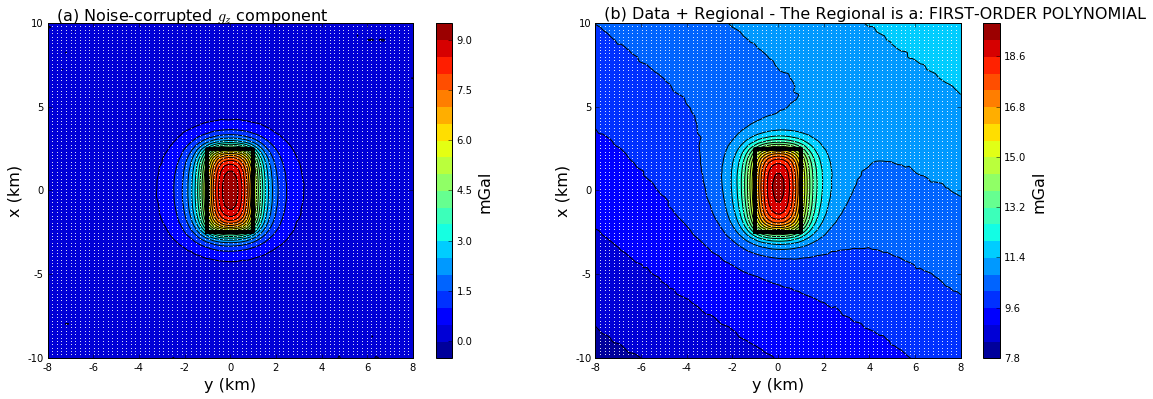

In [16]:
file_name = '..\\figs\\Observed_Gz'

plt.figure(figsize=(18, 6))
unit_handle = 'mGal'

if (Regional_Information is None):
    print 'Data Without Regional Background'
    print '\n No regional map \n '
    af_L.Plot_Onemap(xp, yp, gz, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title='Noise-corrupted $g_z$ component', 
                label_x = 'y (km)', label_y = 'x (km)', label_size= 16.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = unit_handle)
elif ('CONSTANT' in Regional_Information):
    print("REGIONAL INFORMATION ADDED TO THE ORIGINAL DATA WAS: {}".format(Regional_Information))
    print '\n'+Regional_Information+'  =  %4.3f \n' %Regional_Constant 

plt.figure(figsize=(18, 6))
unit_handle = 'mGal'

if (Regional_Information is None):
    print 'Data Without Regional Background'
    print '\n No regional map \n '
    af_L.Plot_Onemap(xp, yp, gz, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title='Noise-corrupted $g_z$ component', 
                label_x = 'y (km)', label_y = 'x (km)', label_size= 16.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = unit_handle)
elif ('CONSTANT' in Regional_Information):
    print("REGIONAL INFORMATION ADDED TO THE ORIGINAL DATA WAS: {}".format(Regional_Information))
    print '\n'+Regional_Information+'  =  %4.3f \n' %Regional_Constant 
    print '\n No regional map \n '
    
    af_L.Plot_Twomaps(xp, yp, data, gz, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title1 = " (a) Noise-corrupted $g_z$ component", 
                figure_title2 = " (b) Data + Regional - The Regional is a: {}".format(Regional_Information),
                label_x = 'y (km)', label_y = 'x (km)', label_size= 16.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = 'mGal')
elif('FIRST-ORDER POLYNOMIAL' in Regional_Information) or ('SECOND-ORDER POLYNOMIAL' in Regional_Information):
    af_L.Plot_Threemaps(xp, yp, data, Regional, gz, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title1 = " (a) Noise-corrupted $g_z$ component", 
                figure_title2 = " (b) The Regional is a: {}".format(Regional_Information),
                figure_title3 = "(C)  Data + Regional",
                label_x = 'y (km)', label_y = 'x (km)', label_size= 12.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = 'mGal')

    plt.savefig(file_name+'.eps', dpi=600)
    
    print '\n No regional map \n '
    
    af_L.Plot_Twomaps(xp, yp, data, gz, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title1 = " (a) Noise-corrupted $g_z$ component", 
                figure_title2 = " (b) Data + Regional - The Regional is a: {}".format(Regional_Information),
                label_x = 'y (km)', label_y = 'x (km)', label_size= 16.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = 'mGal')
elif('FIRST-ORDER POLYNOMIAL' in Regional_Information) or ('SECOND-ORDER POLYNOMIAL' in Regional_Information):
    af_L.Plot_Threemaps(xp, yp, data, Regional, gz, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title1 = " (a) Noise-corrupted $g_z$ component", 
                figure_title2 = " (b) The Regional is a: {}".format(Regional_Information),
                figure_title3 = "(C)  Data + Regional",
                label_x = 'y (km)', label_y = 'x (km)', label_size= 12.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = 'mGal')

    plt.savefig(file_name+'.eps', dpi=600)
    

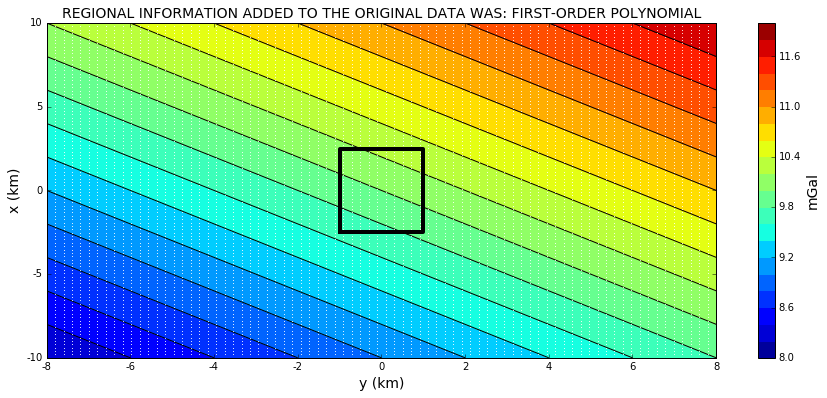

In [17]:
if (Regional_Information is None) or ('CONSTANT' in Regional_Information):
    print '\n No regional map \n '
else:
    file_name = '..\\figs\\Regional'
    plt.figure(figsize=(15, 6))
    unit_handle = 'mGal'
    
    af_L.Plot_Onemap(xp, yp, Regional, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title="REGIONAL INFORMATION ADDED TO THE ORIGINAL DATA WAS: {}".format(Regional_Information), 
                label_x = 'y (km)', label_y = 'x (km)', label_size= 14.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = unit_handle)
    
    plt.savefig(file_name+'.eps', dpi=600)

### Verifying the New Number of the Data given by the length of the variable gz

In [18]:
Npts = len(gz)
print 'number of data: Npts', Npts

assert (xp.size == Npts) and (yp.size == Npts) and (zp.size == Npts),  \
                'xp, yp and zp must have the same size defined by Npts'


number of data: Npts 8000


## Save the model and synthetic data

In [19]:
if Regional_Information is not None: 
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = """# Generated by {name} on {date}
    # shape (nx, ny):
    # {nx} {ny}
    {Reg_Inf}
    # xp yp zp, data, Regional, Data + Regional 
    """.format(date=now, name=notebook_name, nx=regular_grid['shape'][0], ny=regular_grid['shape'][1], Reg_Inf=Regional_Information)
    with open('../data/synthetic-data.txt', 'w') as f:
        f.write(header)
        np.savetxt(f, np.c_[xp, yp, zp, data, Regional, gz],fmt='%.6f')
else: 
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = """# Generated by {name} on {date}
    # shape (nx, ny):
    # {nx} {ny}
    {Reg_Inf}
    # xp yp zp, gz 
    """.format(date=now, name=notebook_name, nx=regular_grid['shape'][0], ny=regular_grid['shape'][1], Reg_Inf=Regional_Information)
    with open('../data/synthetic-data.txt', 'w') as f:
        f.write(header)
        np.savetxt(f, np.c_[xp, yp, zp, gz],fmt='%.6f')


### Classical Equivalent Layer

In [20]:
# creating the equivalent Layer x and y coordinates 

xs = np.copy(xp)
ys = np.copy(yp)

#horizontal plane containing the equivalent sources located at plano_fonte 
plano_fonte=400.
zs = np.zeros_like(zp) + plano_fonte

M_source= len(xs)

assert (xs.size == M_source) and (ys.size == M_source) and (zs.size == M_source),  \
                'xs, ys and zs must have the same size defined by M_source'

print 'number of the equivalent sources at the equivalent layer: M_source', M_source

number of the equivalent sources at the equivalent layer: M_source 8000


In [21]:
print len(xp), len(yp), len(zp), len(xs), len(ys), len(zs)

8000 8000 8000 8000 8000 8000


##### Creating the sensitivity matrix based on $g_z$ component of point of masses

####### Computing the sensitivity matrix by column 

A_GZ = np.empty((Npts,M_source),dtype = float)

for j in range(M_source):
    A_GZ[:,j] = AZ(xp, yp, zp, xs[j],ys[j],zs[j])
   

In [22]:
# Computing the sensitivity matrix by row

A_GZ = np.empty((Npts,M_source),dtype = float)

for i in range(Npts):
    A_GZ[i,:] = af_L.AZ(xp[i], yp[i], zp[i], xs,ys,zs)
   

In [23]:
ATA = np.empty((M_source,M_source),dtype =float)
ATA = np.dot(A_GZ.T, A_GZ)

# Gradient
ATdo = np.dot(A_GZ.T,gz)

In [24]:
reg_parameter = 0.0000000000000000000001

In [25]:
Hessiana  = ATA + diags([reg_parameter], 0, (M_source,M_source), format='csr', dtype='float')

p_estimate = linalg.solve(Hessiana,ATdo)


In [26]:
gz_predicted    = np.dot(A_GZ,p_estimate)
residual        = gz - gz_predicted

### Plot observed and predicted inverted data

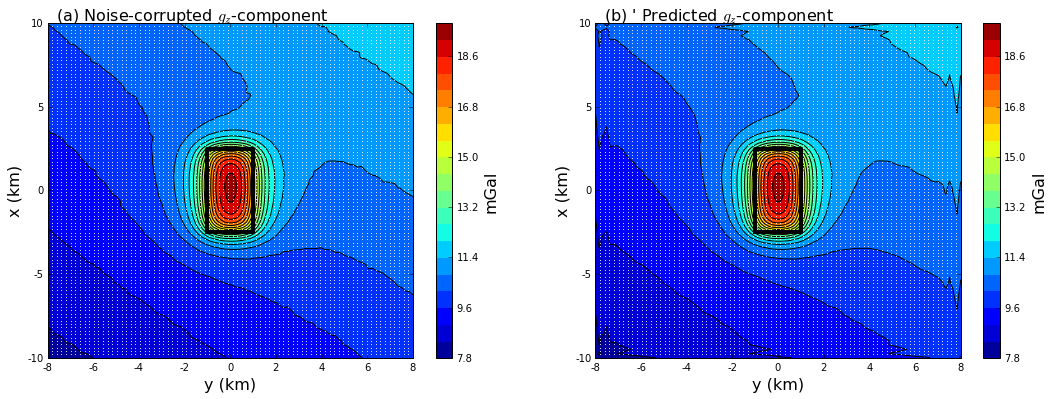

In [27]:
file_name = '..\\figs\\Observed_And_Predicted_Gz'
plt.figure(figsize=(18, 6))
unit_handle = 'mGal'

af_L.Plot_Twomaps(xp, yp, gz, gz_predicted, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title1 = " (a) Noise-corrupted $g_z$-component", 
                figure_title2 = " (b) ' Predicted $g_z$-component ",
                label_x = 'y (km)', label_y = 'x (km)', label_size= 16.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = unit_handle)

## Plot the residual data and the histogram

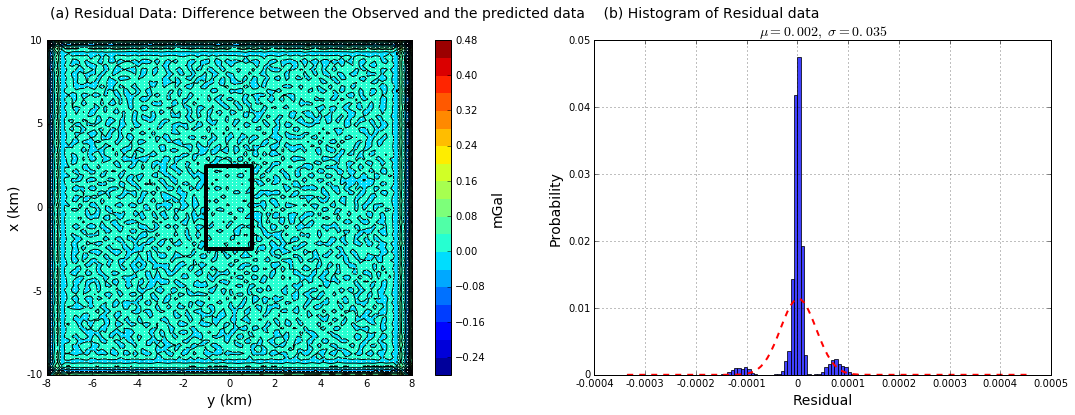

In [28]:
file_name = '..\\figs\\Residual_and_Histogram_Gz'
plt.figure(figsize=(18, 6))
unit_handle = 'mGal'

af_L.Plot_Onemap_Histog(xp, yp, residual, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title1  = "(a) Residual Data: Difference between the Observed and the predicted data", 
                figure_title2 = " (b) Histogram of Residual data",
                label_x = 'y (km)', label_y = 'x (km)', label_size= 14.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = 'mGal')

plt.savefig(file_name+'.eps', dpi=600)

### Plot the estimated Equivalent Layer

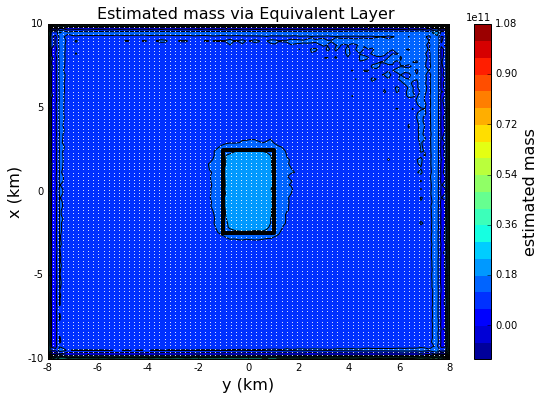

In [29]:
file_name = '..\\figs\\Estimated_Equivalent_Layer'

plt.figure(figsize=(9, 6))
unit_handle = 'estimated mass'

af_L.Plot_Onemap(xp, yp, p_estimate, regular_grid['shape'], 
                prism_projection = True, projection_style = '-k', line_width = 4.0,
                model = full_model['projection'], 
                figure_title= 'Estimated mass via Equivalent Layer ', 
                label_x = 'y (km)', label_y = 'x (km)', label_size= 16.0, 
                observations= True, point_style= 'w.', point_size = 1, unit = unit_handle)

plt.savefig(file_name+'.eps', dpi=600)

##  FTG calculated via Equivalent Layer

In [30]:
gxx_analitico = []
gxy_analitico = []
gxz_analitico = []
gyy_analitico = []
gyz_analitico = []
gzz_analitico = []

for i in range(Npts):
    gxx_analitico=np.append(gxx_analitico, np.dot(af_L.A_DERIVES(xp[i],yp[i],zp[i],xs,ys,zs)[0], p_estimate))
    gxy_analitico=np.append(gxy_analitico, np.dot(af_L.A_DERIVES(xp[i],yp[i],zp[i],xs,ys,zs)[1], p_estimate))
    gxz_analitico=np.append(gxz_analitico, np.dot(af_L.A_DERIVES(xp[i],yp[i],zp[i],xs,ys,zs)[2], p_estimate))
    gyy_analitico=np.append(gyy_analitico, np.dot(af_L.A_DERIVES(xp[i],yp[i],zp[i],xs,ys,zs)[3], p_estimate))
    gyz_analitico=np.append(gyz_analitico, np.dot(af_L.A_DERIVES(xp[i],yp[i],zp[i],xs,ys,zs)[4], p_estimate))
    gzz_analitico=np.append(gzz_analitico, np.dot(af_L.A_DERIVES(xp[i],yp[i],zp[i],xs,ys,zs)[5], p_estimate))

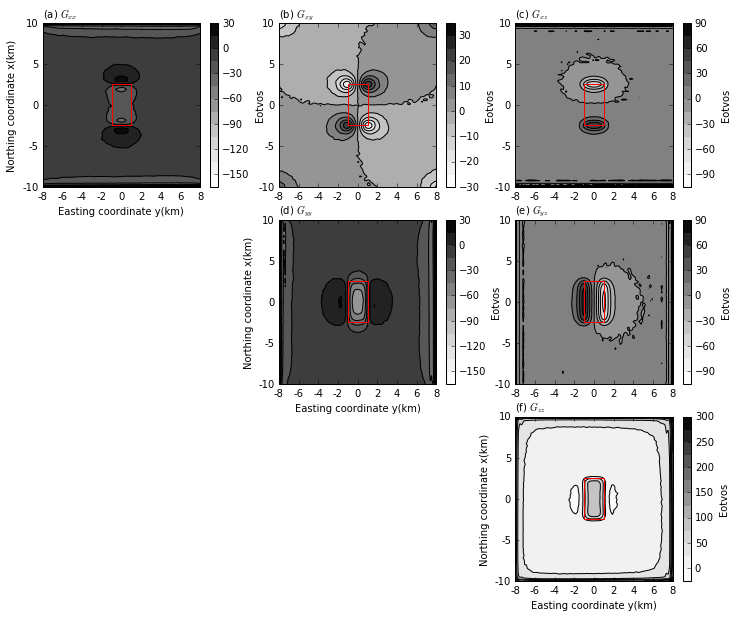

In [31]:
file_name = '..\\figs\\FTG_Estimated_EqLayer'


unit_handle = 'Eotvos'
plt.figure(figsize=(12, 10))
af_L.Plot_FTG(xp, yp, gxx_analitico, gxy_analitico, gxz_analitico, 
                gyy_analitico, gyz_analitico, gzz_analitico,
                regular_grid['shape'], 
                prism_projection = True, projection_style = '-r', line_width = 1.0,
                model = full_model['projection'], 
                label_x = 'Easting coordinate y(km)', label_y = 'Northing coordinate x(km)', label_size= 10.0, unit = unit_handle)


   
plt.savefig(file_name+'.eps', dpi=600)

##  TRUE FTG 

In [32]:
gxx_true = []
gxy_true = []
gxz_true = []
gyy_true = []
gyz_true = []
gzz_true = []

gxx_true = prism.gxx(xp,yp,zp,full_model['model'])
gxy_true = prism.gxy(xp,yp,zp,full_model['model'])
gxz_true = prism.gxz(xp,yp,zp,full_model['model'])
gyy_true = prism.gyy(xp,yp,zp,full_model['model'])
gyz_true = prism.gyz(xp,yp,zp,full_model['model'])
gzz_true = prism.gzz(xp,yp,zp,full_model['model'])
                                          

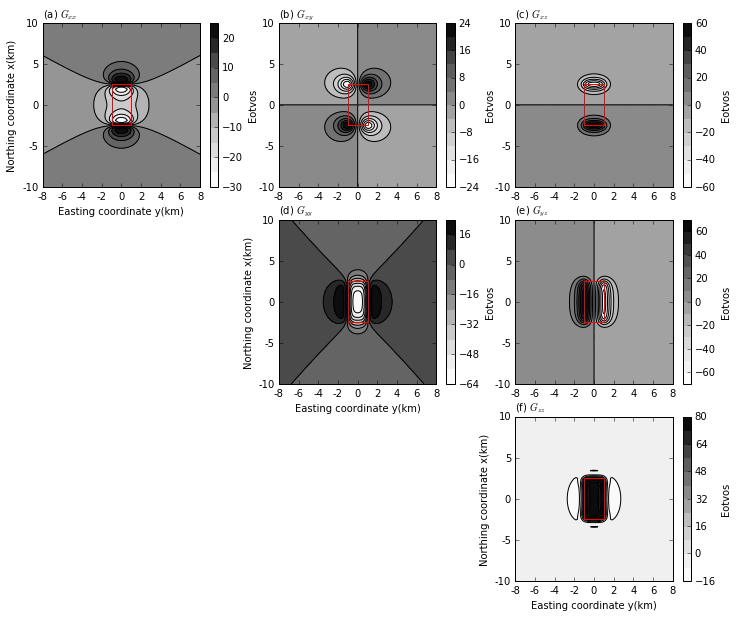

In [33]:
file_name = '..\\figs\\FTG_TRUE'

unit_handle = 'Eotvos'
plt.figure(figsize=(12, 10))
af_L.Plot_FTG(xp, yp, gxx_true, gxy_true, gxz_true, 
                gyy_true, gyz_true, gzz_true,
                regular_grid['shape'], 
                prism_projection = True, projection_style = '-r', line_width = 1.0,
                model = full_model['projection'], 
                label_x = 'Easting coordinate y(km)', label_y = 'Northing coordinate x(km)', label_size= 10.0, unit = unit_handle)


   
plt.savefig(file_name+'.eps', dpi=600)

### FTG RESIDUALS 

In [34]:
res_gxx= gxx_true - gxx_analitico
res_gxy= gxy_true - gxy_analitico
res_gxz= gxz_true - gxz_analitico
res_gyy= gyy_true - gyy_analitico
res_gyz= gyz_true - gyz_analitico
res_gzz= gzz_true - gzz_analitico

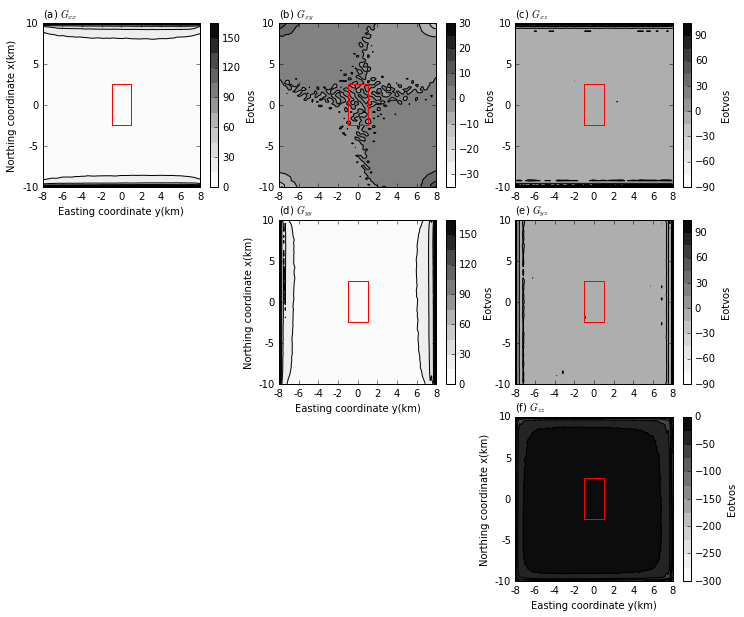

In [35]:
file_name = '..\\figs\\FTG_RESIDUALS'

unit_handle = 'Eotvos'
plt.figure(figsize=(12, 10))

af_L.Plot_FTG(xp, yp, res_gxx, res_gxy, res_gxz, 
                res_gyy, res_gyz, res_gzz,
                regular_grid['shape'], 
                prism_projection = True, projection_style = '-r', line_width = 1.0,
                model = full_model['projection'], 
                label_x = 'Easting coordinate y(km)', label_y = 'Northing coordinate x(km)', label_size= 10.0, unit = unit_handle)


   
plt.savefig(file_name+'.eps', dpi=600)

### THE HISTOGRAMS OF THE FTG RESIDUALS

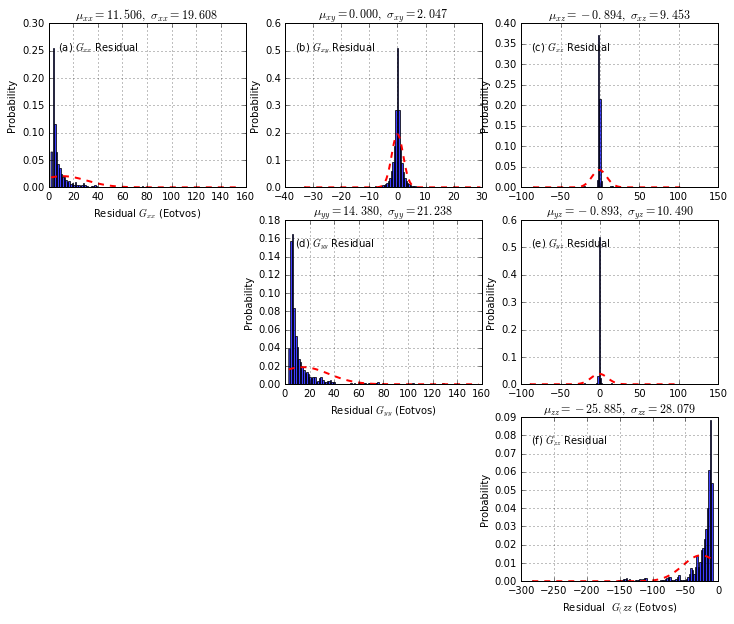

In [36]:
file_name = '..\\figs\\HISTOGRAMS_FTG_RESIDUALS'


unit_handle = 'Eotvos'
plt.figure(figsize=(12, 10))

mu_xx,sigma_xx,mu_xy,sigma_xy,mu_xz,sigma_xz,mu_yy,sigma_yy,mu_yz,sigma_yz,mu_zz,sigma_zz \
  = af_L.Plot_FTG_Histog(xp, yp, res_gxx, res_gxy, res_gxz, res_gyy, res_gyz, res_gzz, 
                             label_size= 16.0, unit = unit_handle)

plt.savefig(file_name+'.eps', dpi=600)

In [37]:
with open('reports\\report_%s.md' % notebook_name[:st.index(notebook_name,'.')], 'w') as f:
    f.write('# Saved Informations \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    f.write('\n\n'+header+'\n\n')
    
    f.write('\n\n Estimated means and standard deviations of the FTG \n\n')
    f.write('mu_{xx} =  %4.3f,     sigma_{xx} =  %4.3f   \n '     %(mu_xx, sigma_xx))
    f.write('mu_{xy} =  %4.3f,     sigma_{xy} =  %4.3f   \n '     %(mu_xy, sigma_xy))
    f.write('mu_{xz} =  %4.3f,     sigma_{xz} =  %4.3f   \n '     %(mu_xz, sigma_xz))
    f.write('mu_{yy} =  %4.3f,     sigma_{yy} =  %4.3f   \n '     %(mu_yy, sigma_yy))
    f.write('mu_{yz} =  %4.3f,     sigma_{yz} =  %4.3f   \n '     %(mu_yz, sigma_yz))
    f.write('mu_{zz} =  %4.3f,     sigma_{zz} =  %4.3f   \n '     %(mu_zz, sigma_zz))
    
    
    f.write("\nREGIONAL INFORMATION ADDED TO THE ORIGINAL DATA WAS: \n {} \n".format(Regional_Information))
    if Regional_Information is not None: 
        if 'CONSTANT' in Regional_Information:
            f.write('\n'+Regional_Information+'  =  %4.3f \n' %Regional_Constant)
        elif 'FIRST-ORDER POLYNOMIAL' in Regional_Information:
            f.write('\n'+Regional_Information+' with coefficients:   \n')
            for kk in coef_1th: f.write(str(kk) + '\n')
        elif 'SECOND-ORDER POLYNOMIAL'in Regional_Information:
            f.write( '\n '+Regional_Information+' with coefficients: \n' )
            for kk in coef_2th: f.write(str(kk) + '\n')
    else:
        f.write( '\n Data Without Regional Background \n')
                
    
    
                

In [38]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
print now

05 June 2018 19:48:35 UTC
